In [164]:
import itertools
import matplotlib
import numpy as np
import pandas as pd
import networkx as nx
import scipy.io as spio
import matplotlib.pyplot as plt

In [114]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Import Data into Pandas Dataframe

In [187]:
PATH = 'data/facebook100/'
american75_data_path = PATH + "Berkeley13.mat"
data = spio.loadmat(american75_data_path)
attr = data['local_info']

In [200]:
data['A'].toarray()[0].shape

(22937,)

In [188]:
# columns: a student/faculty flag, gender, major, second major/minor (if applicable), dorm, year, high school
# 0 ~ missing / inapplicable

student_faculty_flag, gender, major, second_major_minor, dorm, yr, hs = [], [], [], [], [], [], []
columns = [student_faculty_flag, gender, major, second_major_minor, dorm, yr, hs]

for i in range(len(attr)):
    cur_subject = attr[i]
    for j in range(len(columns)):
        cur_col = columns[j]
        cur_attr_value = cur_subject[j]
        cur_col.append(cur_attr_value)

In [189]:
df = pd.DataFrame({"Student or Faculty" : student_faculty_flag,
                   "Gender" : gender,
                   "Major" : major,
                   "Second Major / Minor" : second_major_minor,
                   "Dorm" : dorm,
                   "Year" : yr,
                   "High School" : hs})

In [190]:
df.head(3)

,Student or Faculty,Gender,Major,Second Major / Minor,Dorm,Year,High School
0,1,1,374,289,208,2006,1384
1,1,1,367,0,0,2008,3093
2,2,2,319,0,0,2005,2248


#### Constructing the graph

In [191]:
def get_graph_with_attr(num_nodes, category, adjacency_matrix, data, save_file = False, filename = False):
    netw = adjacency_matrix.toarray()[:num_nodes, :num_nodes]
    print(netw.shape)
    
    # constructing attributes for graph
    attr_data = data[[category]].iloc[:num_nodes, :]
    attr_data['Node ID'] = np.arange(num_nodes)
    attr_data = attr_data[['Node ID', category]]
    
    # Make graph object
    G = nx.from_numpy_array(netw)

    # Make types into categories
    attr_data.set_index('Node ID')
    attr_data.reindex(G.nodes())
    attr_data[category] = pd.Categorical(attr_data[category])
    
    if save_file:
        fig = plt.figure(figsize=(12,12))
        ax = plt.subplot(111)
        nx.draw(G, with_labels=True, node_color=attr_data[category].cat.codes, node_size = 15, font_size = 4) 
        plt.savefig("{}.png".format(filename), format="PNG")
        print("Saved {}.".format(filename))
        return 
    
    nx.draw(G, with_labels=True, node_color=attr_data[category].cat.codes, node_size = 15, font_size = 4) 

In [192]:
df.columns

Index(['Student or Faculty', 'Gender', 'Major', 'Second Major / Minor', 'Dorm',
       'Year', 'High School'],
      dtype='object')

(2000, 2000)


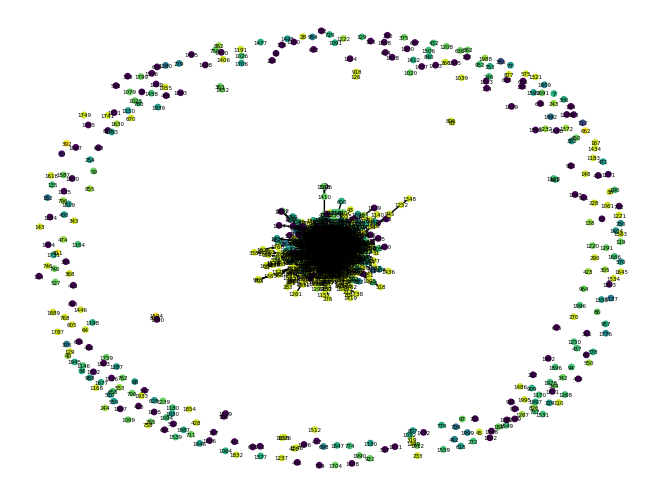

In [204]:
get_graph_with_attr(2000, 'Year', data['A'], df)

#### Possible next steps
- do we want to continue this at all? since this is also an educational environment
- there are 100 universities with same data format. visualize all of them (by different attr)?